Loading the Custom-NER Model

In [ ]:
!unzip IdentifyingModulesandGrades.zip

Archive:  IdentifyingModulesandGrades.zip
  inflating: IdentifyingModulesandGrades/config.cfg  
  inflating: IdentifyingModulesandGrades/meta.json  
   creating: IdentifyingModulesandGrades/ner/
  inflating: IdentifyingModulesandGrades/ner/cfg  
  inflating: IdentifyingModulesandGrades/ner/model  
  inflating: IdentifyingModulesandGrades/ner/moves  
  inflating: IdentifyingModulesandGrades/tokenizer  
   creating: IdentifyingModulesandGrades/vocab/
 extracting: IdentifyingModulesandGrades/vocab/key2row  
 extracting: IdentifyingModulesandGrades/vocab/lookups.bin  
  inflating: IdentifyingModulesandGrades/vocab/strings.json  
  inflating: IdentifyingModulesandGrades/vocab/vectors  
 extracting: IdentifyingModulesandGrades/vocab/vectors.cfg  


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pdf2image
!apt-get install poppler-utils
!pip install spacy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,621 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import spacy
import random
import pandas as pd
from spacy.util import minibatch, compounding
from spacy.training.example import Example
from spacy import displacy
from spacy.tokens import DocBin
from tqdm import tqdm
import glob
import pytesseract
from pdf2image import convert_from_path
import re
import csv

try:
    import json
    import os

    import pandas as  pd
    import spacy

    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob

    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re


    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline

    import matplotlib.pyplot as plt
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
    from sklearn import svm
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    import seaborn as sns
    from imblearn.over_sampling import SMOTE

    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer

    import swifter

    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))

Error : No module named 'swifter' 


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Load the blank English language model in spaCy

In [ ]:
# Load the blank English language model in spaCy
nlp = spacy.blank("en")

In [ ]:
# Create a new entity type for your custom NER
ner = nlp.create_pipe("ner")
nlp.add_pipe('ner')


In [ ]:
# Disable other pipeline components to focus on NER
pipe_exceptions = ["ner"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

# Extracting the text from an Academic Transcript

In [ ]:
# List all PDF files in the directory
pdf_paths = glob.glob(r"Tharindu.pdf")

# Specify the path and name of the text file
text_file_path = "all_extracted_data.txt"

# Open the text file in append mode
with open(text_file_path, "a") as text_file:
    for pdf_path in pdf_paths:
        pages = convert_from_path(pdf_path, 500)

        for pageNum, imBlob in enumerate(pages):
            text = pytesseract.image_to_string(imBlob, lang='eng')

            # Write the extracted text to the file
            text_file.write(text)

# Read the contents of the text file
with open('all_extracted_data.txt', 'r') as file:
    transcript = file.read()


# Preprocessing and extracting the Necessary sections

In [ ]:

# Read the contents of the text file
with open('all_extracted_data.txt', 'r') as file:
    transcript = file.read()

# Adjusted regular expressions with optional whitespace
#year1_section = re.search(r'YEAR\s*1\n([\s\S]+?)\nYear\s*1\s*Credits=', transcript, re.IGNORECASE).group(1)
#year2_section = re.search(r'YEAR\s*2\n([\s\S]+?)\nYear\s*2\s*Credits=', transcript, re.IGNORECASE).group(1)
#year3_section = re.search(r'YEAR\s*3\n([\s\S]+?)\nYear\s*3\s*Credits=', transcript, re.IGNORECASE).group(1)
#year4_section = re.search(r'YEAR\s*4\n([\s\S]+?)\nYear\s*4\s*Credits=', transcript, re.IGNORECASE).group(1)

#sections = [year1_section, year2_section, year3_section, year4_section]

# Define the pattern to extract the sections
pattern = r'YEAR (\d+)\n([\s\S]+?)\nYear \1 Credits='

# Find all the sections using the pattern
matches = re.findall(pattern, transcript)

# Create a list of sections
sections = [match[1] for match in matches]

# Save sections to a text file
output_text_file_path = "extracted_sections.txt"
with open(output_text_file_path, "w") as output_text_file:
    for section in sections:
        output_text_file.write(section + "\n\n")

# Print a message indicating the successful save
print("Extracted sections saved to", output_text_file_path)

Extracted sections saved to extracted_sections.txt


# Load the trained NER model from disk

In [ ]:
import shutil
# Load the trained NER model from disk
nlp_ner = spacy.load('IdentifyingModulesandGrades')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.5.3 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


# Applying the custom NER model to identify Module Titles and the Grades

In [ ]:
# Load the document from the text file
with open("extracted_sections.txt", "r") as file:
    text = file.read()

# Process the document with the custom NER model
doc = nlp_ner(text)

# Extract and print the entities
print("Entities:")
for ent in doc.ents:
    print(ent.text, ent.label_)

Entities:
173031 CODE
Database Systems and Data-Driven Application MODULE_TITLE
1 SEMESTER
Jun - 2022 PERIOD
A Cc
173011 Theory and Practices in Statistical Modelling MODULE_TITLE
1 SEMESTER
Apr - 2021 PERIOD
4 CREDITS
i CODE
d
173021 Data Warehousing and Business Intelligence MODULE_TITLE
1 SEMESTER
Apr - 2021 PERIOD
4 CREDITS
dd GRADE
1T3030 CODE
Programming Applications and Frameworks MODULE_TITLE
1 SEMESTER
Apr - 2021 PERIOD
4 CREDITS
A GRADE
IT3050* CODE
Employability Skills Development - Seminar MODULE_TITLE
1 SEMESTER
Apr - 2021 PERIOD
1 CREDITS
C GRADE
T3041 CODE
Information Retrieval and Web MODULE_TITLE
2 SEMESTER
Oct - 2021 PERIOD
4 CREDITS
B+ GRADE
T3051 CODE
Fundamentals of Data Mining MODULE_TITLE
2 SEMESTER
Oct - 2021 PERIOD
4 CREDITS
B+ GRADE
T3061 CODE
Massive Data Processing and Cloud MODULE_TITLE
2 SEMESTER
Oct - 2021 PERIOD
4 CREDITS
B- GRADE
T3071 CODE
Machine Learning and Optimization MODULE_TITLE
2 SEMESTER
Oct - 2021 PERIOD
4 CREDITS
B- GRADE
1T3110* CODE
Indust

# Getting the Module Titles and the Grades to a seperate CSV File

In [ ]:
import pandas as pd

def test_ner_model(file_path, output_file):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    modules = []
    grades = []

    print("Testing NER on file:", file_path)
    print("Entities:")
    for line in lines:
        doc = nlp_ner(line.strip())
        module_title = None
        grade = None
        for ent in doc.ents:
            if ent.label_ == "MODULE_TITLE":
                module_title = ent.text
            elif ent.label_ == "GRADE":
                grade = ent.text

        if module_title and grade:  # Only append if both module title and grade exist
            modules.append(module_title)
            grades.append(grade)

    # Create a DataFrame with modules and grades
    data = {"Module Title": modules, "Grade": grades}
    df = pd.DataFrame(data)

    # Save the DataFrame to a CSV file
    df.to_csv(output_file, index=False)
    print("Saved extracted data to", output_file)

# Provide the file path to test and output file path
file_path = "extracted_sections.txt"
output_file = "extracted_data.csv"
test_ner_model(file_path, output_file)


Testing NER on file: extracted_sections.txt
Entities:
Saved extracted data to extracted_data.csv


# Categorsing the Module Titles and Module Keywords into Skill Areas

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
countvect = CountVectorizer()

In [ ]:
nltk.download('stopwords')

special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ', text)
    text = extra_symbol_remover.sub('', text)
    return text

In [ ]:
import pickle

# Load the model from the file
with open('skill_prediction.pkl', 'rb') as model_file:
    classification_model = pickle.load(model_file)



**below cell is newly addded to get the same count vector used to build the classification model.that is the one caused th error earlier**

In [ ]:
print(classification_model)
# Assuming your classification_model tuple is defined as follows:
# classification_model = (SVC(kernel='linear', random_state=0), CountVectorizer())

# Split the tuple to access the model and vectorizer
model, countvect = classification_model
print(model)
# Fit the model on training data (you should do this before calling predict)
# model.fit(X_train, y_train)

# Predict using the fitted model
#predicted_categories = model.predict(module_title_vectors)


(SVC(kernel='linear', random_state=0), CountVectorizer())
SVC(kernel='linear', random_state=0)


In [ ]:
# import joblib

# # Load the model from the file
# classification_model = joblib.load('skill_prediction.joblib')

Akeel Newly Added Codes (above cell didn't need) all done using below cell

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
import pickle

# Load the model from the file
with open('skill_prediction.pkl', 'rb') as model_file:
    classification_model = pickle.load(model_file)

# Assuming your classification_model tuple is defined as follows:
# classification_model = (SVC(kernel='linear', random_state=0), CountVectorizer())

# Split the tuple to access the model and vectorizer
model, countvect = classification_model

# Read module titles from the first CSV file
module_titles_df = pd.read_csv('extracted_data.csv')

# Extract module titles from the DataFrame
module_titles = module_titles_df['Module Title']

# Read module titles and module keywords from the second CSV file
module_keywords_df = pd.read_csv('Module Keywords.csv')

# Create a dictionary to map module titles to their corresponding module keywords
module_title_to_keywords = dict(zip(module_keywords_df['Module Title'], module_keywords_df['Module Keywords']))

# Define a function to predict skill areas
def predict_skill_area(module_titles, module_title_to_keywords):
    predicted_categories = []
    for module_title in module_titles:
        module_keywords = module_title_to_keywords.get(module_title, "")
        combined_text = module_title.lower() + ' ' + module_keywords.lower()
        module_title_vector = countvect.transform([combined_text])
        predicted_category = model.predict(module_title_vector)
        predicted_categories.append(predicted_category[0])  # Assuming you want a single prediction
    return predicted_categories

# Predict skill areas using the function
predicted_skill_areas = predict_skill_area(module_titles, module_title_to_keywords)
print("Predicted Skill Areas:", predicted_skill_areas)


Predicted Skill Areas: ['Database Management', 'Programming and Software Development', 'Programming and Software Development', 'Data Science and Analytics', 'Database Management', 'Programming and Software Development', 'Artificial Intelligence and Machine Learning', 'Artificial Intelligence and Machine Learning', 'Data Science and Analytics', 'User Experience and Design', 'Data Science and Analytics', 'Programming and Software Development', 'Database Management', 'Data Science and Analytics']


In [ ]:
# Map the module titles from the extracted data to the module titles in the module outline
module_titles_df['Category'] = predicted_skill_areas
# merged_df = module_titles_df.merge(module_keywords_df, on='Module Title', how='left')

# Define the grade weighting dictionary
grade_weighting = {
    'A+': 10,
    'A': 9,
    'A-': 8,
    'B+': 7,
    'B': 6,
    'B-': 5,
    'C+': 4,
    'C': 3,
    'C-': 2,
    'D+': 1,
    'D': 1,
    'E': 1
}

# Calculate the weighted grades based on the grade weighting dictionary
module_titles_df['Weighted Grade'] = module_titles_df['Grade'].map(grade_weighting)

# Create a table with the skill areas, module titles, module descriptions, and weighted grades
skill_area_table = module_titles_df[['Category', 'Module Title',  'Weighted Grade']]

#Exclude module titles with category "Core Competencies"
skill_area_table = skill_area_table[skill_area_table['Category'] != "core competencies and soft skills"]

# #Exclude module titles not present in the module outline CSV file
# skill_area_table = skill_area_table.dropna(subset=['Module Keywords'])

# Display the skill area table
skill_area_table.head(20)

,Category,Module Title,Weighted Grade
0,Database Management,Data Warehousing and Business Intelligence,NaN
1,Programming and Software Development,Programming Applications and Frameworks,9.0
2,Programming and Software Development,Employability Skills Development - Seminar,3.0
3,Data Science and Analytics,Information Retrieval and Web,7.0
4,Database Management,Fundamentals of Data Mining,7.0
5,Programming and Software Development,Massive Data Processing and Cloud,5.0
6,Artificial Intelligence and Machine Learning,Machine Learning and Optimization,5.0
7,Artificial Intelligence and Machine Learning,Industry Placement,3.0
8,Data Science and Analytics,Internet of Things and Big Data Analytics,5.0
9,User Experience and Design,Visual Analytics and User Experience Design,8.0


# Calcuating the weight of each category and displaying it

Category
Data Science and Analytics                      30.0
Programming and Software Development            24.0
Database Management                             15.0
Artificial Intelligence and Machine Learning     8.0
User Experience and Design                       8.0
Name: Weighted Grade, dtype: float64


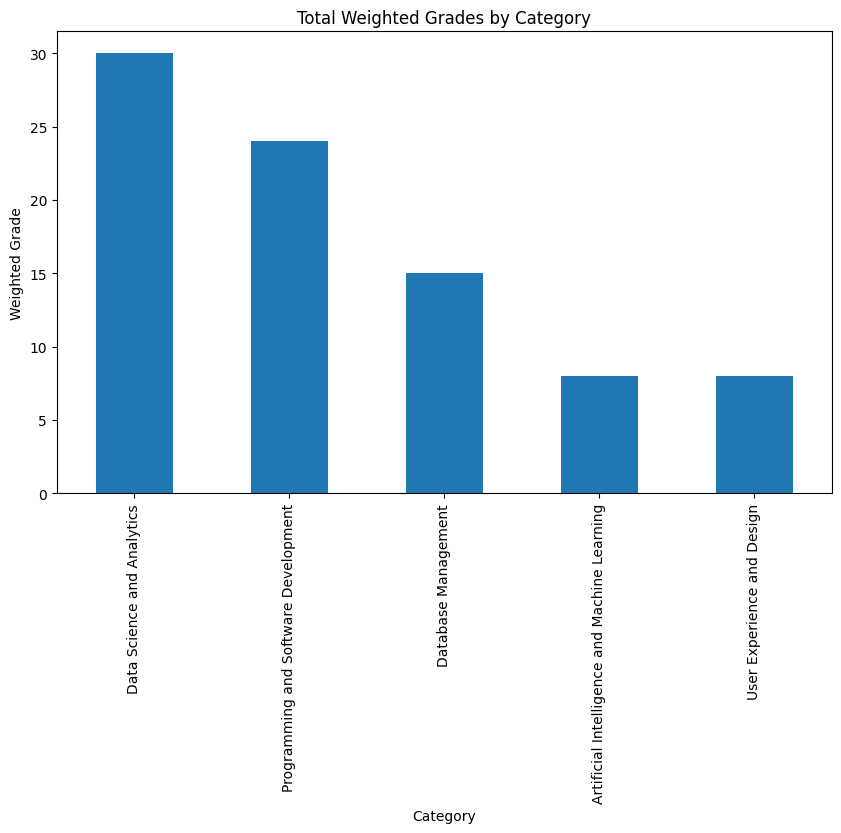

In [ ]:
# Group the skill area table by the 'Category' column and calculate the sum of the 'Weighted Grade' column for each category
category_totals = module_titles_df.groupby('Category')['Weighted Grade'].sum()

# Sort the categories by their total weighted grades in descending order
category_totals = category_totals.sort_values(ascending=False)

# Display the category totals table
print(category_totals)

# Exclude 'Core Competencies' category from category_totals
category_totals = category_totals[category_totals.index != 'core competencies and soft skills']

# Plot the bar graph of weighted grades in each category
plt.figure(figsize=(10, 6))
category_totals.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Weighted Grade')
plt.title('Total Weighted Grades by Category')

plt.show()

# Displaying the skill areas using a pie chart

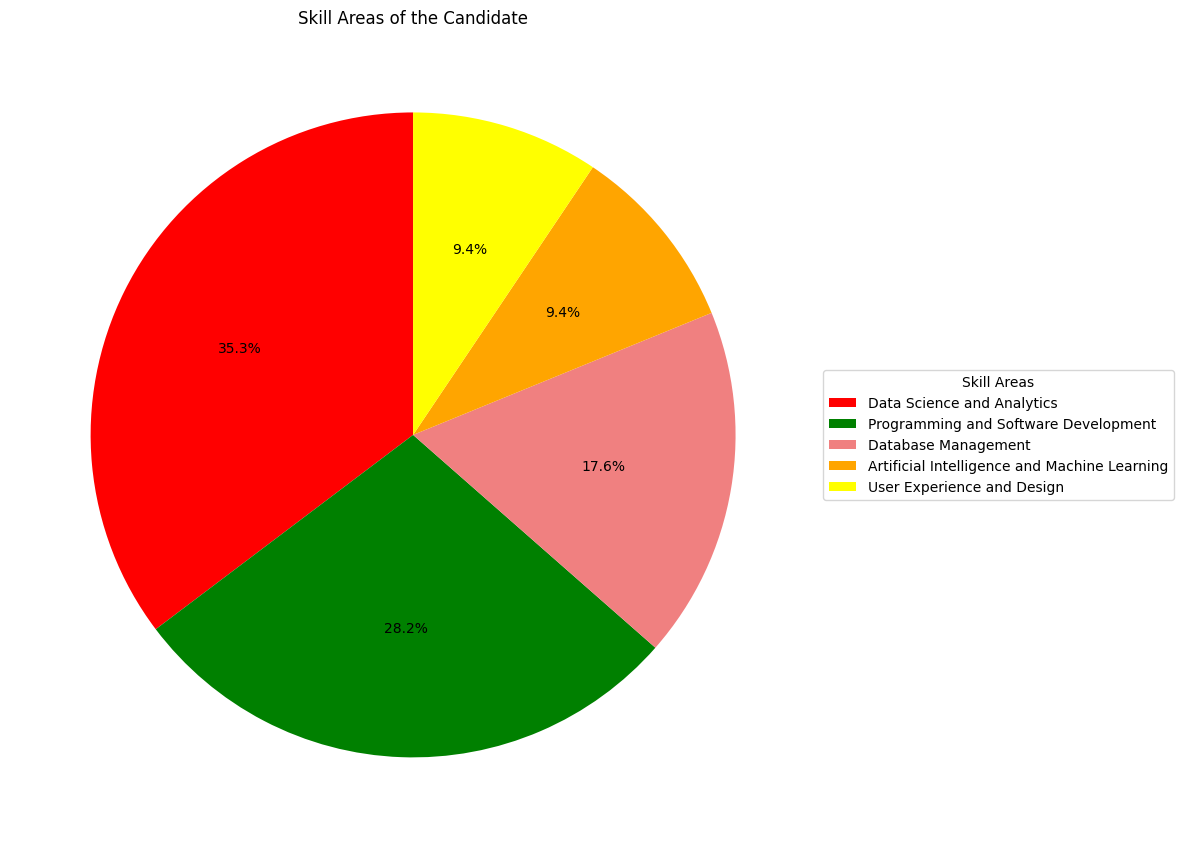

In [ ]:
import matplotlib.pyplot as plt

# Generate the pie chart
plt.figure(figsize=(14, 14))
plt.pie(category_totals, labels=None, autopct='%1.1f%%', startangle=90)

# Set colors for each category
colors = ['red', 'green', 'lightcoral', 'orange', 'yellow', 'pink', 'lightblue', 'gray', 'lavender', 'salmon']

# Customize colors for each pie slice
for i, wedge in enumerate(plt.gca().patches):
    wedge.set_facecolor(colors[i % len(colors)])

# Add a legend with categories and colors
legend_labels = category_totals.index
legend_colors = colors[:len(legend_labels)]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Skill Areas', labelcolor='black')

# Add a title
plt.title('Skill Areas of the Candidate')

# Adjust layout to make room for the legend
plt.tight_layout(rect=(0, 0, 0.85, 1))

plt.show()



# Displaying the Skill Areas using a Radar Graph

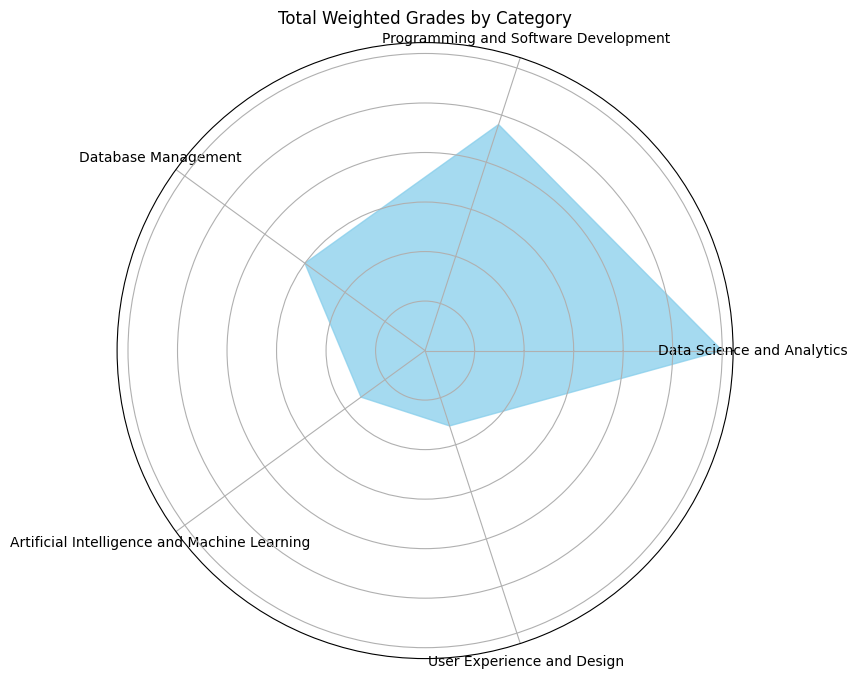

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the number of categories and angles
num_categories = len(category_totals)
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Get the weighted grades and category names
grades = category_totals.values
category_names = category_totals.index

# Plot the radar graph
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.fill(angles, grades, color='skyblue', alpha=0.75)
ax.set_xticks(angles)
ax.set_xticklabels(category_names)
ax.set_yticklabels([])
ax.set_title('Total Weighted Grades by Category')

plt.show()
